Try to normalize the data

In [3]:
import sys
sys.path.append('/Users/leah/Columbia/courses/19summer/SocialBehavior/SocialBehaviorptc')

In [4]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
#%matplotlib notebook

from IPython.display import HTML

import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

from ssm.hmm import HMM, HSMM
from ssm.util import find_permutation
from ssm.observations import AutoRegressiveObservations, AutoRegressiveDiagonalNoiseObservations
from ssm.observations import Observations
from ssm.stats import diagonal_gaussian_logpdf

In [5]:
import joblib

datasets_processed = joblib.load('/Users/leah/Columbia/courses/19summer/SocialBehavior/tracedata/all_data_3_1')  # a list of length 30, each is a social_dataset

rendered_data = []
for dataset in datasets_processed:
    session_data = dataset.render_trajectories([3,8])  # list of length 2, each item is an array (T, 2). T = 36000
    rendered_data.append(np.concatenate((session_data),axis = 1)) # each item is an array (T, 4)
trajectories = np.concatenate(rendered_data,axis = 0)  # (T*30, 4)

traj29 = rendered_data[29]

In [12]:
arena_x_max = 320
arena_y_max = 380

In [22]:
arena_center = np.array([arena_x_max/2, arena_y_max/2, arena_x_max/2, arena_y_max/2])

In [23]:
normalized_data = np.zeros_like(traj29)

In [24]:
normalized_data[:,0] = traj29[:,0] / arena_x_max * 10
normalized_data[:,1] = traj29[:,1] / arena_y_max * 10
normalized_data[:,2] = traj29[:,2] / arena_x_max * 10
normalized_data[:,3] = traj29[:,3] / arena_y_max * 10

In [25]:
np.min(normalized_data, axis=0)

array([0.76522505, 0.12864359, 0.91263443, 0.1471745 ])

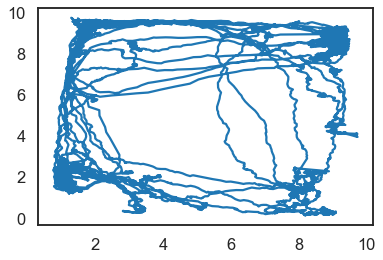

In [35]:
plt.plot(normalized_data[:,0], normalized_data[:,1])

In [28]:
K = 5
D = 4

In [29]:
model1 = HMM(K, D, M=0, 
                 observations='ar', mu_init=arena_center)

In [30]:
model1_lls = model1.fit(normalized_data, method="em", num_em_iters=100)

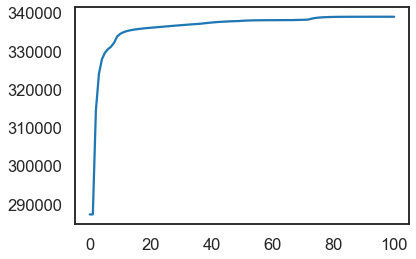

In [32]:
plt.plot(model1_lls)

In [33]:
duration = 36000

sample_z, sample_x = model1.sample(duration)

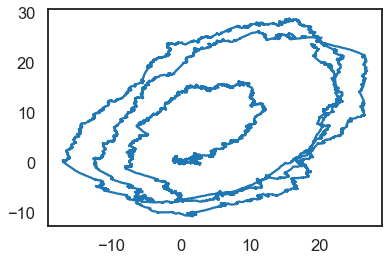

In [34]:
plt.plot(sample_x[:,0], sample_x[:,1])